In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-price-prediction/Real estate.csv


In [2]:
df=pd.read_csv('/kaggle/input/real-estate-price-prediction/Real estate.csv')

In [3]:
df.shape

(414, 8)

In [4]:
df.sample(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
140,141,2013.250,16.2,289.3248,5,24.98203,121.54348,51.4
123,124,2013.417,0.0,185.4296,0,24.97110,121.53170,45.5
56,57,2013.417,33.6,371.2495,8,24.97254,121.54059,41.9
28,29,2013.500,19.2,557.4780,4,24.97419,121.53797,47.0
76,77,2013.583,35.9,616.4004,3,24.97723,121.53767,36.8
144,145,2013.083,11.9,1360.1390,1,24.95204,121.54842,28.4
362,363,2013.417,17.1,967.4000,4,24.98872,121.53408,40.0
222,223,2013.583,30.6,431.1114,10,24.98123,121.53743,48.5
120,121,2013.167,13.3,492.2313,5,24.96515,121.53737,31.3
390,391,2013.500,32.8,377.8302,9,24.97151,121.54350,38.6


In [5]:
df.drop(columns=['No'],inplace=True)

In [6]:
df.sample(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
388,2013.500,10.4,2251.9380,4,24.95957,121.51353,27.3
227,2012.917,32.4,265.0609,8,24.98059,121.53986,40.2
353,2013.500,4.1,2147.3760,3,24.96299,121.51284,31.3
107,2013.333,12.2,1360.1390,1,24.95204,121.54842,26.6
331,2013.333,25.6,4519.6900,0,24.94826,121.49587,15.6
51,2013.083,31.3,1758.4060,1,24.95402,121.55282,20.7
363,2013.500,32.3,109.9455,10,24.98182,121.54086,48.0
296,2012.750,12.5,1144.4360,4,24.99176,121.53456,34.1
348,2012.833,4.6,259.6607,6,24.97585,121.54516,53.7
189,2012.917,16.3,4066.5870,0,24.94297,121.50342,20.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [8]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [9]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

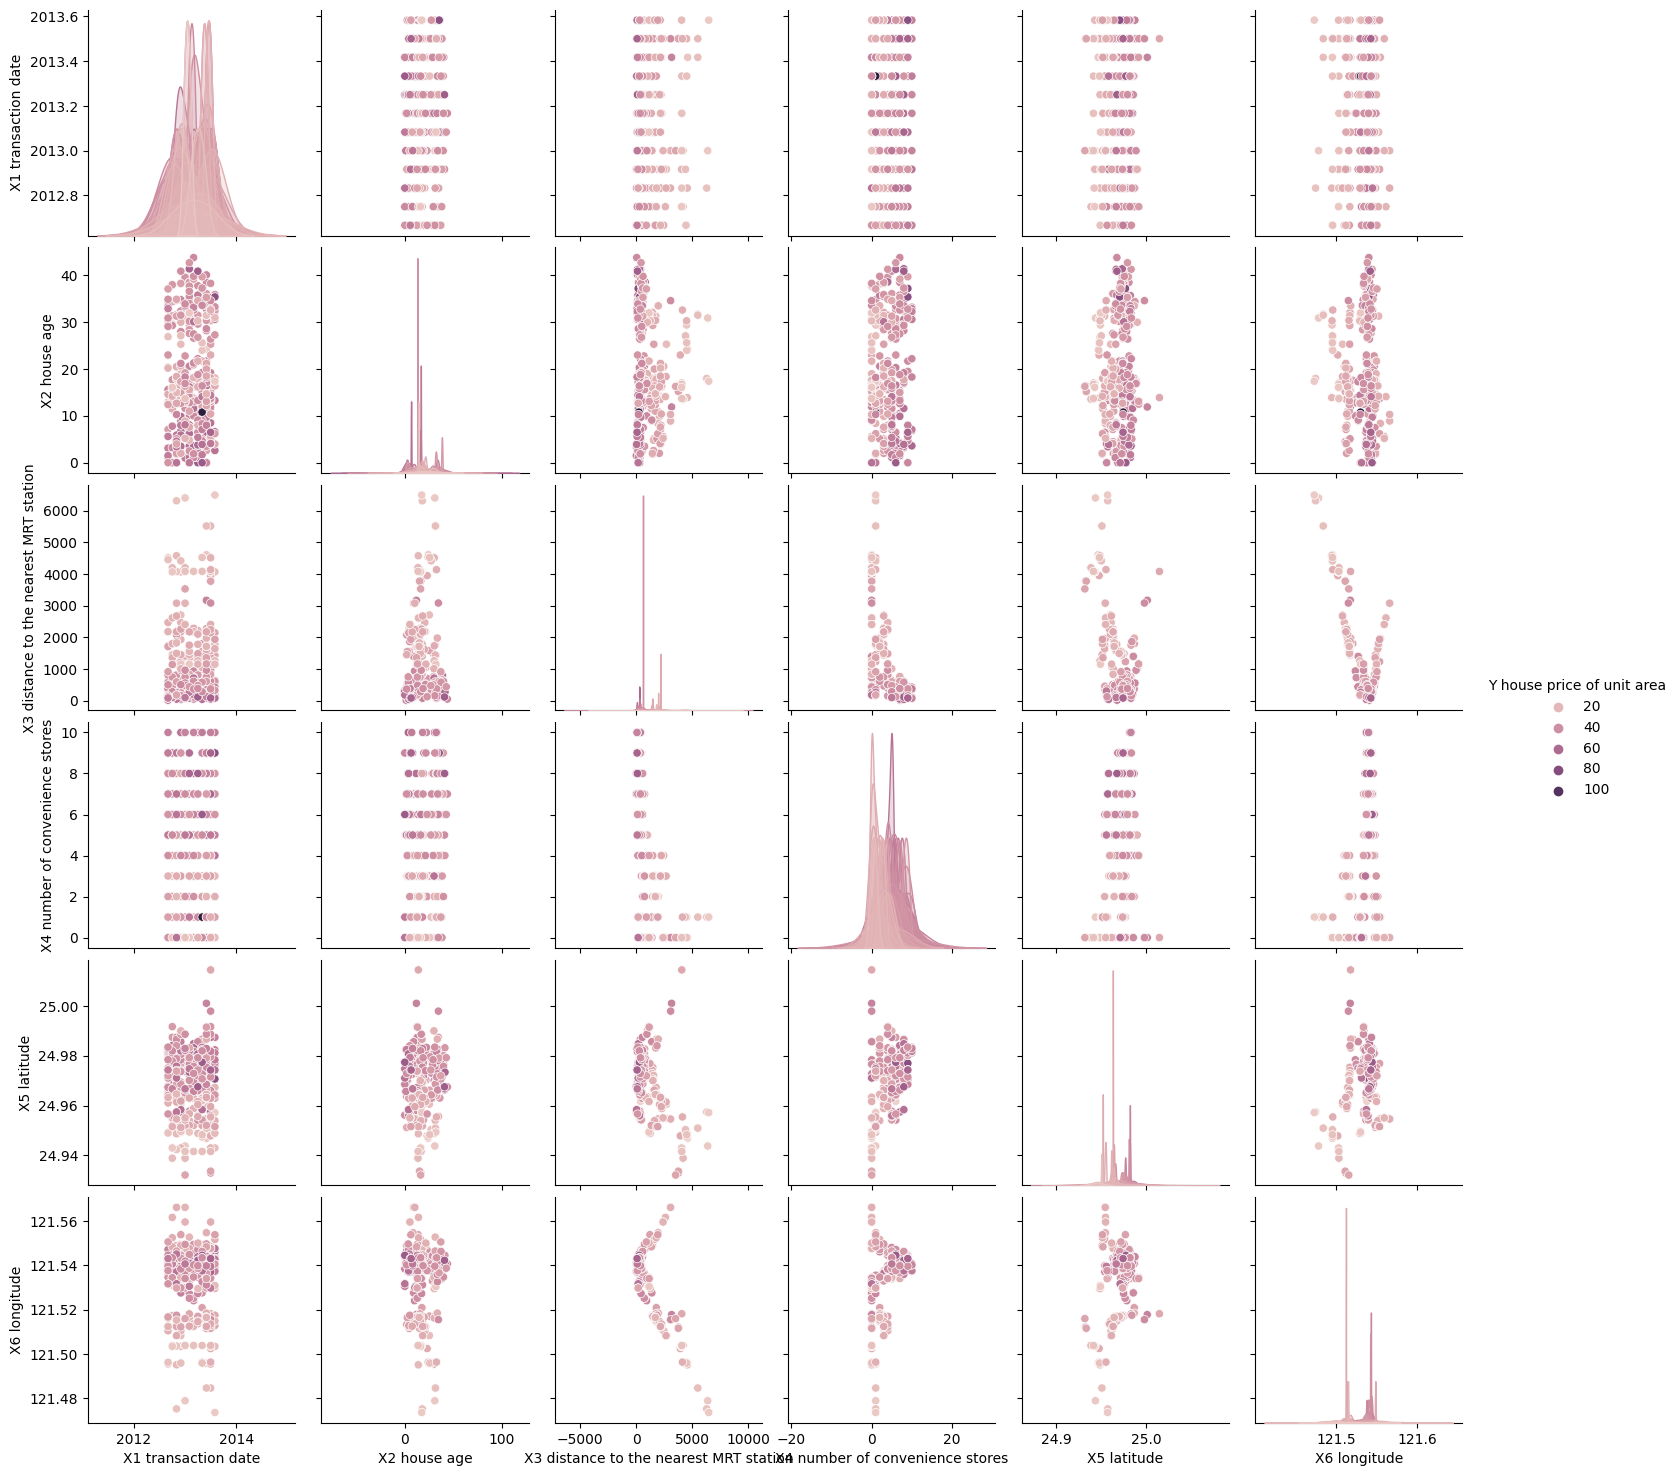

In [12]:
sns.pairplot(df,hue='Y house price of unit area')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

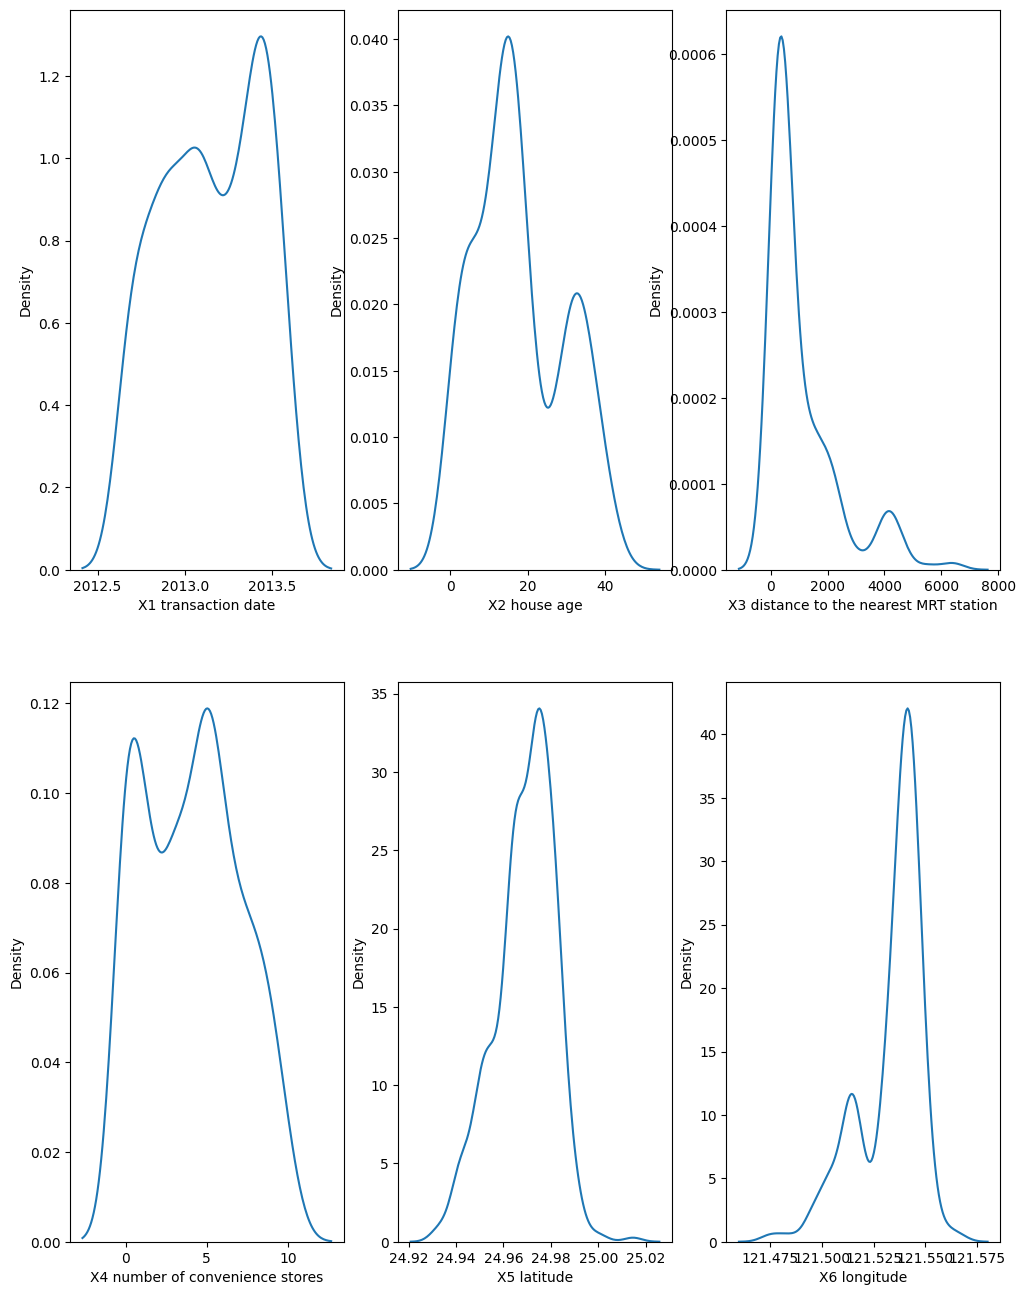

In [13]:
plt.figure(figsize=(12,16))
i=1

for col in df.drop(columns='Y house price of unit area'):
    plt.subplot(2,3,i)
    sns.kdeplot(df,x=col)
    i+=1


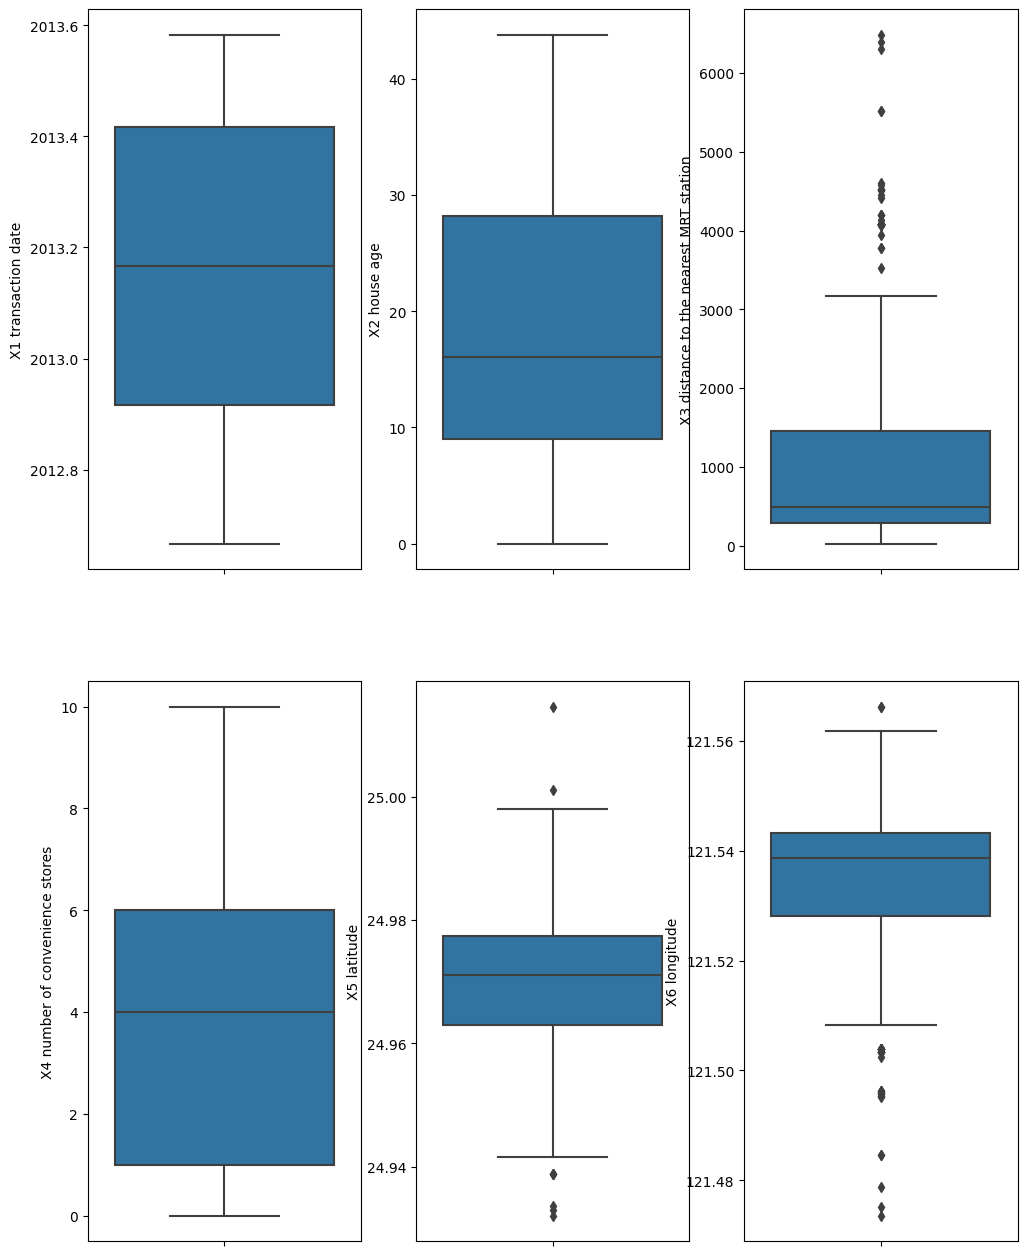

In [14]:
plt.figure(figsize=(12,16))
i=1

for col in df.drop(columns='Y house price of unit area'):
    plt.subplot(2,3,i)
    sns.boxplot(df,y=col)
    i+=1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

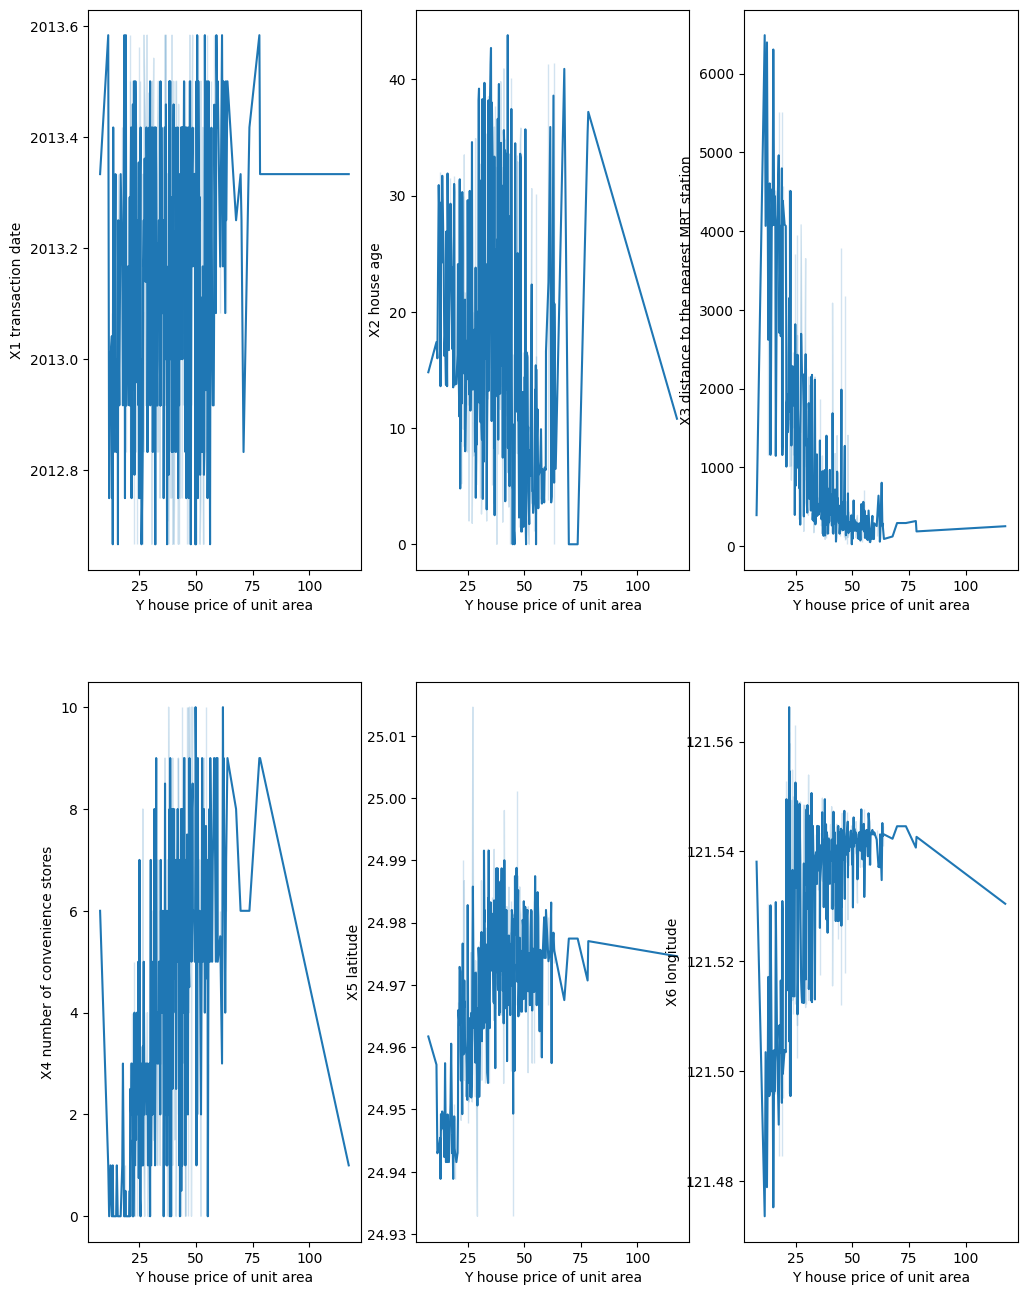

In [15]:
plt.figure(figsize=(12,16))
i=1

for col in df.drop(columns='Y house price of unit area'):
    plt.subplot(2,3,i)
    sns.lineplot(df,y=col,x='Y house price of unit area')
    i+=1


In [16]:
#Handling outliers
percentile25 = df['X3 distance to the nearest MRT station'].quantile(0.25)
percentile75 = df['X3 distance to the nearest MRT station'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)



Upper limit 3201.7103
Lower limit -1458.1065000000003


In [17]:
df[df['X3 distance to the nearest MRT station'] > upper_limit]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
8,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8
30,2013.500,25.9,4519.690,0,24.94826,121.49587,22.1
35,2013.500,13.9,4079.418,0,25.01459,121.51816,27.3
40,2013.000,13.6,4082.015,0,24.94155,121.50381,15.9
41,2013.500,16.8,4066.587,0,24.94297,121.50342,18.2
48,2013.417,24.2,4605.749,0,24.94684,121.49578,13.4
49,2012.667,29.4,4510.359,1,24.94925,121.49542,13.2
58,2013.500,30.3,4510.359,1,24.94925,121.49542,22.6
73,2013.167,13.8,4082.015,0,24.94155,121.50381,20.0
87,2013.583,16.9,4066.587,0,24.94297,121.50342,18.3


In [18]:
df['X3 distance to the nearest MRT station'] = np.where(
    df['X3 distance to the nearest MRT station'] > upper_limit,
    upper_limit,
    np.where(
        df['X3 distance to the nearest MRT station'] < lower_limit,
        lower_limit,
        df['X3 distance to the nearest MRT station']
    )
)

<Axes: ylabel='X3 distance to the nearest MRT station'>

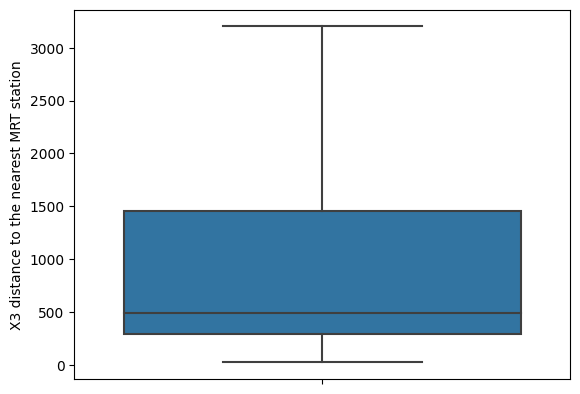

In [19]:
sns.boxplot(df,y='X3 distance to the nearest MRT station')

In [20]:
#Handling outliers
percentile25 = df['X6 longitude'].quantile(0.25)
percentile75 = df['X6 longitude'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)



Upper limit 121.566135
Lower limit 121.505255


In [21]:
df['X6 longitude'] = np.where(
    df['X6 longitude'] > upper_limit,
    upper_limit,
    np.where(
        df['X6 longitude'] < lower_limit,
        lower_limit,
        df['X6 longitude']
    )
)

<Axes: ylabel='X6 longitude'>

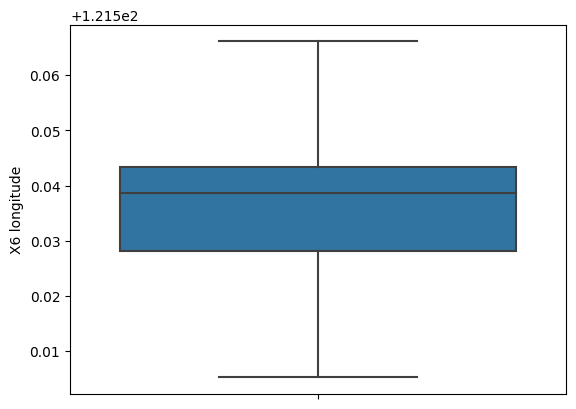

In [22]:
sns.boxplot(df,y='X6 longitude')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='Y house price of unit area'),df.iloc[:,-1],test_size=0.33,random_state=42)

In [25]:
X_train.shape,y_train.shape

((277, 6), (277,))

In [26]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

In [27]:
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [29]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=lr.predict(X_test)

In [31]:
r2_score(y_test,y_pred)

0.5759058492407918

In [32]:
s=SVR()
s.fit(X_train,y_train)

SVR()

In [33]:
y_pred=s.predict(X_test)
r2_score(y_test,y_pred)

0.6114391151722851

In [34]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
y_pred=dt.predict(X_test)
r2_score(y_test,y_pred)

0.5590083336635054

In [36]:
rf=RandomForestRegressor(n_estimators=200,max_depth=15,min_samples_split=4,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_split=4, n_estimators=200,
                      random_state=42)

In [37]:
y_pred=rf.predict(X_test)
r2_score(y_test,y_pred)

0.7230089884437111